# NEURAL NETWORK

## MATH/STATS Library

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Neural Network Library

In [2]:
import tensorflow
tensorflow.random.set_seed(1)
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

## Machine Learning Library

In [3]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Import Dataset

In [4]:
df = pd.read_csv(r'C:\Workbook\Funds\mutual_funds.csv')

In [5]:
df.head(5)

,fund_symbol,fund_extended_name,fund_family,inception_date,category,rating,return_rating,risk_rating,investment_type,size_type,...,fund_return_2010_q2,fund_return_2010_q1,fund_alpha_5years,fund_alpha_10years,fund_beta_5years,fund_beta_10years,fund_standard_deviation_5years,fund_standard_deviation_10years,fund_sharpe_ratio_5years,fund_sharpe_ratio_10years
0,AAAAX,DWS RREEF Real Assets Fund - Class A,DWS,2007-07-29,World Allocation,3.0,3.0,3.0,Blend,Large,...,-2.53,2.23,-2.86,-3.86,1.05,0.93,10.39,8.67,0.33,0.24
1,AAADX,Aberdeen Income Builder Fund Class A,Aberdeen,2011-12-29,Allocation - 50% to 70% Equity,4.0,5.0,5.0,Blend,Large,...,NaN,NaN,-0.30,-0.15,1.36,1.45,10.21,11.70,0.74,0.89
2,AAAGX,Thrivent Large Cap Growth Fund Class A,Thrivent Funds,1999-10-28,Large Growth,3.0,3.0,4.0,Growth,Large,...,-14.29,4.09,2.92,0.77,1.04,1.08,16.49,15.40,0.88,0.93
3,AAAIX,American Century Strategic Allocation: Aggress...,American Century Investments,2000-07-31,Allocation - 70% to 85% Equity,4.0,4.0,3.0,Blend,Large,...,-8.13,3.92,-0.78,-0.48,1.39,1.37,12.35,11.44,0.61,0.73
4,AAANX,Horizon Active Asset Allocation Fund Investor ...,Horizon Investments,2012-01-30,Tactical Allocation,3.0,4.0,5.0,Blend,Large,...,NaN,NaN,-4.38,NaN,1.67,NaN,15.06,NaN,0.37,NaN


In [6]:
df.shape

(17839, 87)

## Clean data

In [7]:
df.isna().sum().sum()

219420

In [8]:
df.dropna(inplace = True)

In [9]:
df.isna().sum().sum()

0

In [10]:
df.shape

(8080, 87)

# Features and Target

In [11]:
df.columns

Index(['fund_symbol', 'fund_extended_name', 'fund_family', 'inception_date',
       'category', 'rating', 'return_rating', 'risk_rating', 'investment_type',
       'size_type', 'currency', 'fund_net_annual_expense_ratio', 'asset_cash',
       'asset_stocks', 'asset_bonds', 'asset_others', 'asset_preferred',
       'asset_convertable', 'price_earnings_ratio', 'price_book_ratio',
       'price_sales_ratio', 'price_cashflow_ratio', 'median_market_cap',
       'sector_basic_materials', 'sector_consumer_cyclical',
       'sector_financial_services', 'sector_real_estate',
       'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities',
       'sector_communication_services', 'sector_energy', 'sector_industrials',
       'sector_technology', 'fund_return_5years', 'fund_return_10years',
       'fund_return_2020_q3', 'fund_return_2020_q2', 'fund_return_2020_q1',
       'fund_return_2019_q4', 'fund_return_2019_q3', 'fund_return_2019_q2',
       'fund_return_2019_q1', 'fund_return_201

In [12]:
X= df[['price_earnings_ratio', 'price_book_ratio','price_sales_ratio', 'price_cashflow_ratio','sector_basic_materials', 'sector_consumer_cyclical', 'sector_financial_services', 'sector_real_estate',
       'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities','sector_communication_services', 'sector_energy', 'sector_industrials','sector_technology']]
X.head()

,price_earnings_ratio,price_book_ratio,price_sales_ratio,price_cashflow_ratio,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology
0,19.41,1.83,2.30,11.13,13.52,1.62,0.00,42.97,1.54,0.00,15.29,1.67,11.53,11.87,0.00
2,38.70,11.46,5.31,26.26,1.09,20.42,14.43,1.32,0.86,12.87,0.00,11.63,0.00,3.20,34.18
3,21.81,2.45,1.44,11.45,3.49,12.79,12.07,5.72,7.54,14.48,2.49,7.36,2.31,11.89,19.86
5,19.41,1.83,2.30,11.13,13.52,1.62,0.00,42.97,1.54,0.00,15.29,1.67,11.53,11.87,0.00
7,21.81,2.45,1.44,11.45,3.49,12.79,12.07,5.72,7.54,14.48,2.49,7.36,2.31,11.89,19.86


In [13]:
print(type(X))
X.shape

<class 'pandas.core.frame.DataFrame'>


(8080, 15)

In [14]:
y = df['fund_return_10years']
y

0         2.38
2        14.71
3         8.66
5         1.61
7         7.91
         ...  
17810     8.07
17811     5.33
17812    10.71
17813     9.58
17814     9.86
Name: fund_return_10years, Length: 8080, dtype: float64

In [ ]:
print(type(y))
y 
len(y)

#People_List = ['Jon','Mark','Maria','Jill','Jack']
#df = pd.DataFrame (People_List,columns=['First_Name'])

#y = pd.DataFrame (y,columns=['Fund_return'])


## TRAIN /TEST

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Scaling Data

In [16]:
scaler = StandardScaler()

In [17]:
scaler = scaler.fit(X_train)

In [18]:
X_train = scaler.transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

## NUMBER OF NEURONS

In [20]:
il =len(X.columns)
il

15

### Input Layer

In [ ]:
#il =len(X.columns)+1
#il

### Hidden Layer

In [21]:
len(X_train)

6464

In [22]:
hl = len(X_train)/(1*(1+il))
hl = round(hl)
hl

404

## NEURAL NETWORK ALGORITHM

In [23]:
model = Sequential()

### USING RELU

In [24]:
model.add(Dense(il, input_dim = il, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(hl,activation = 'relu'))
model.add(Dense(1,activation = 'linear'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 404)               6464      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 405       
Total params: 7,109
Trainable params: 7,109
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='mse', optimizer = 'adam', metrics=['mse','mae'])

In [27]:
history = model.fit(X_train, y_train, epochs = 30, batch_size = 150, verbose = 1)

Epoch 1/30
44/44 [==============================] - 1s 5ms/step - loss: 66.3211 - mse: 66.3211 - mae: 7.1602
Epoch 2/30
44/44 [==============================] - 0s 5ms/step - loss: 16.4490 - mse: 16.4490 - mae: 3.2027
Epoch 3/30
44/44 [==============================] - 0s 5ms/step - loss: 9.7170 - mse: 9.7170 - mae: 2.4145
Epoch 4/30
44/44 [==============================] - 0s 5ms/step - loss: 8.1411 - mse: 8.1411 - mae: 2.1796
Epoch 5/30
44/44 [==============================] - 0s 5ms/step - loss: 7.6110 - mse: 7.6110 - mae: 2.0876
Epoch 6/30
44/44 [==============================] - 0s 5ms/step - loss: 7.3444 - mse: 7.3444 - mae: 2.0488
Epoch 7/30
44/44 [==============================] - 0s 7ms/step - loss: 7.1595 - mse: 7.1595 - mae: 2.0156
Epoch 8/30
44/44 [==============================] - 0s 5ms/step - loss: 7.0148 - mse: 7.0148 - mae: 1.9969
Epoch 9/30
44/44 [==============================] - 0s 5ms/step - loss: 6.8747 - mse: 6.8747 - mae: 1.9728
Epoch 10/30
44/44 [==============

dict_keys(['loss', 'mse', 'mae'])


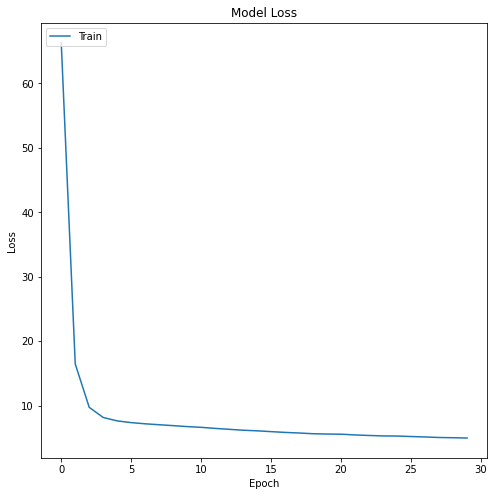

In [28]:
plt.figure(figsize =(8,8))
print(history.history.keys())
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc = 'upper left')
plt.show()

### Predictions

In [29]:
predictions = model.predict(X_test)
predictions

array([[ 8.04796  ],
       [12.344915 ],
       [14.414152 ],
       ...,
       [ 5.2033024],
       [18.172743 ],
       [ 7.4178   ]], dtype=float32)

### SCORE

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(mea)
print(np.sqrt(mse))
print(r2)

1.7314678663568628
2.3738866761749424
0.6971951188307657


In [44]:
np.mean(y_test)

8.32840965346534

In [45]:
np.mean(y_train)

8.225629641089133

In [46]:
np.mean(predictions)

0    8.275335
dtype: float32

## ADD PREDICTIONS TO DATAFRAME

In [ ]:
df.columns

In [ ]:
df.head()

In [33]:
predictions = pd.DataFrame(predictions)
df[['predictions']] = predictions

In [37]:
df2 = df[['fund_return_10years','predictions']]
df2.head(10)

,fund_return_10years,predictions
0,2.38,8.047960
2,14.71,14.414152
3,8.66,4.284278
5,1.61,2.218926
7,7.91,4.646356
8,2.55,10.284960
9,6.02,4.283463
13,2.68,7.284965
15,6.81,6.062467
16,6.54,6.448971
